In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

In [5]:


# データの読み込み
print("=== ステップ1: データの読み込みと確認 ===")
df = pd.read_csv('iris-dataset.csv')

# データの基本情報を確認
print("データの形状:", df.shape)
print("\n最初の5行:")
print(df.head())

print("\nデータの統計情報:")
print(df.describe())

print("\n各列の情報:")
print(df.info())

print("\n種類別のデータ数:")
print(df['species'].value_counts())


=== ステップ1: データの読み込みと確認 ===
データの形状: (150, 5)

最初の5行:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

データの統計情報:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

各列の情報:
<clas

In [6]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

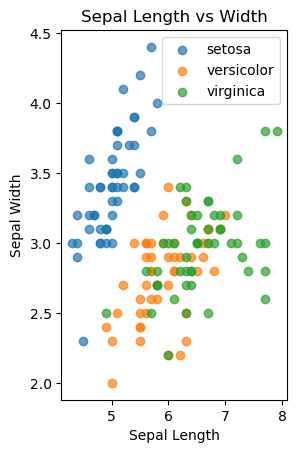

In [7]:
plt.subplot(1, 2, 1)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], 
               label=species, alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width')
plt.legend()

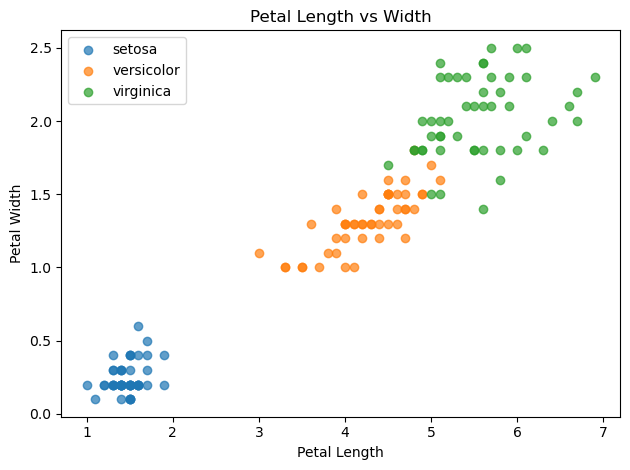

In [8]:
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal_length'], subset['petal_width'], 
               label=species, alpha=0.7)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# ステップ2: データの前処理（特徴量とターゲットの分離）
from sklearn.preprocessing import LabelEncoder

# 特徴量とターゲットの分離
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species'].values

print("=== ステップ2: データの前処理 ===")
print("特徴量 X の形状:", X.shape)
print("ターゲット y の形状:", y.shape)
print("\nX の最初の5行:")
print(X[:5])
print("\ny の最初の5行:")
print(y[:5])

=== ステップ2: データの前処理 ===
特徴量 X の形状: (150, 4)
ターゲット y の形状: (150,)

X の最初の5行:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

y の最初の5行:
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


In [10]:
# ステップ3: ラベルエンコーディング（文字列を数値に変換）
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("=== ステップ3: ラベルエンコーディング ===")
print("元のラベル:", y[:10])
print("エンコード後:", y_encoded[:10])
print("\nクラス名と対応する数値:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} → {i}")

=== ステップ3: ラベルエンコーディング ===
元のラベル: ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa']
エンコード後: [0 0 0 0 0 0 0 0 0 0]

クラス名と対応する数値:
setosa → 0
versicolor → 1
virginica → 2


In [11]:
def to_categorical(y, num_classes=3):
    """数値ラベルをOne-hotベクトルに変換"""
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_onehot = to_categorical(y_encoded)

print("=== ステップ4: One-hot エンコーディング ===")
print("元の数値ラベル:", y_encoded[:5])
print("One-hot変換後の形状:", y_onehot.shape)
print("One-hot変換後（最初の5行）:")
print(y_onehot[:5])
print("\n各行の解釈:")
for i in range(3):
    print(f"[{i}行目] {y_encoded[i]} → {y_onehot[i]} (クラス: {label_encoder.classes_[y_encoded[i]]})")

=== ステップ4: One-hot エンコーディング ===
元の数値ラベル: [0 0 0 0 0]
One-hot変換後の形状: (150, 3)
One-hot変換後（最初の5行）:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

各行の解釈:
[0行目] 0 → [1. 0. 0.] (クラス: setosa)
[1行目] 0 → [1. 0. 0.] (クラス: setosa)
[2行目] 0 → [1. 0. 0.] (クラス: setosa)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y_encoded
)

print("=== ステップ5: データ分割 ===")
print("全体のデータ数:", X.shape[0])
print("学習用データ:", X_train.shape)
print("テスト用データ:", X_test.shape)
print("学習用ラベル:", y_train.shape)
print("テスト用ラベル:", y_test.shape)

# 各クラスがちゃんと分割されてるかチェック
print("\n学習用データの各クラス数:")
for i, class_name in enumerate(label_encoder.classes_):
    count = np.sum(y_train[:, i])
    print(f"{class_name}: {count:.0f}個")

=== ステップ5: データ分割 ===
全体のデータ数: 150
学習用データ: (120, 4)
テスト用データ: (30, 4)
学習用ラベル: (120, 3)
テスト用ラベル: (30, 3)

学習用データの各クラス数:
setosa: 40個
versicolor: 40個
virginica: 40個


In [13]:
from sklearn.preprocessing import StandardScaler

# 標準化器を学習用データで学習
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 注意：testデータではtransformのみ！

print("=== ステップ6: データ標準化 ===")
print("標準化前の学習データ統計:")
print("平均値:", np.mean(X_train, axis=0))
print("標準偏差:", np.std(X_train, axis=0))

print("\n標準化後の学習データ統計:")
print("平均値:", np.mean(X_train_scaled, axis=0))
print("標準偏差:", np.std(X_train_scaled, axis=0))

print("\n標準化前後の比較（最初の3サンプル）:")
print("標準化前:")
print(X_train[:3])
print("標準化後:")
print(X_train_scaled[:3])

=== ステップ6: データ標準化 ===
標準化前の学習データ統計:
平均値: [5.84166667 3.04416667 3.77083333 1.20416667]
標準偏差: [0.837415   0.44380849 1.76003768 0.76063524]

標準化後の学習データ統計:
平均値: [-1.20829273e-15 -2.53315887e-15  1.48029737e-16  1.55246186e-15]
標準偏差: [1. 1. 1. 1.]

標準化前後の比較（最初の3サンプル）:
標準化前:
[[4.4 2.9 1.4 0.2]
 [4.9 2.5 4.5 1.7]
 [6.8 2.8 4.8 1.4]]
標準化後:
[[-1.72156775 -0.32483982 -1.34703555 -1.32016847]
 [-1.12449223 -1.22612948  0.41429037  0.65186742]
 [ 1.14439475 -0.55016223  0.58474127  0.25746024]]


In [14]:
def sigmoid(x):
    """シグモイド関数 - 隠れ層で使用"""
    # オーバーフローを防ぐためにクリッピング
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """シグモイドの微分 - 誤差逆伝播で使用"""
    return x * (1 - x)

def softmax(x):
    """ソフトマックス関数 - 出力層で使用（多クラス分類）"""
    # 数値安定性のため最大値を引く
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

print("=== ステップ7: 活性化関数のテスト ===")
# テスト用データ
test_input = np.array([[-2, -1, 0, 1, 2]])

print("シグモイドのテスト:")
sigmoid_output = sigmoid(test_input)
print("入力:", test_input)
print("出力:", sigmoid_output)

print("\nソフトマックスのテスト:")
softmax_input = np.array([[1, 2, 3], [1, 1, 1]])
softmax_output = softmax(softmax_input)
print("入力:", softmax_input)
print("出力:", softmax_output)
print("各行の合計:", np.sum(softmax_output, axis=1))

=== ステップ7: 活性化関数のテスト ===
シグモイドのテスト:
入力: [[-2 -1  0  1  2]]
出力: [[0.11920292 0.26894142 0.5        0.73105858 0.88079708]]

ソフトマックスのテスト:
入力: [[1 2 3]
 [1 1 1]]
出力: [[0.09003057 0.24472847 0.66524096]
 [0.33333333 0.33333333 0.33333333]]
各行の合計: [1. 1.]


In [15]:
class SimpleMLPDemo:
    def __init__(self, input_size=4, hidden_size=8, output_size=3):
        print(f"=== ステップ8: ネットワーク初期化 ===")
        print(f"入力層: {input_size}ニューロン")
        print(f"隠れ層: {hidden_size}ニューロン") 
        print(f"出力層: {output_size}ニューロン")
        
        # Xavier初期化で重みを設定
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))
        
        print("\n重みの形状:")
        print(f"W1: {self.W1.shape} (入力層→隠れ層)")
        print(f"b1: {self.b1.shape} (隠れ層バイアス)")
        print(f"W2: {self.W2.shape} (隠れ層→出力層)")
        print(f"b2: {self.b2.shape} (出力層バイアス)")
        
        print(f"\n重みの初期値例（W1の最初の3x3）:")
        print(self.W1[:3, :3])

# テスト用にインスタンス作成
model = SimpleMLPDemo()

=== ステップ8: ネットワーク初期化 ===
入力層: 4ニューロン
隠れ層: 8ニューロン
出力層: 3ニューロン

重みの形状:
W1: (4, 8) (入力層→隠れ層)
b1: (1, 8) (隠れ層バイアス)
W2: (8, 3) (隠れ層→出力層)
b2: (1, 3) (出力層バイアス)

重みの初期値例（W1の最初の3x3）:
[[ 1.34455128  0.46443078 -0.75090718]
 [ 0.80309728 -0.3749477  -0.09106551]
 [ 0.3639687  -1.67405244 -0.11546936]]


In [16]:
# ステップ9: 順伝播の実装
def forward_propagation(self, X):
    """順伝播: 入力 → 隠れ層 → 出力層"""
    print(f"=== 順伝播のステップ ===")
    print(f"入力データの形状: {X.shape}")
    
    # 隠れ層の計算
    self.z1 = np.dot(X, self.W1) + self.b1  # 線形変換
    print(f"z1 (隠れ層の入力) 形状: {self.z1.shape}")
    
    self.a1 = sigmoid(self.z1)  # 活性化関数
    print(f"a1 (隠れ層の出力) 形状: {self.a1.shape}")
    
    # 出力層の計算  
    self.z2 = np.dot(self.a1, self.W2) + self.b2  # 線形変換
    print(f"z2 (出力層の入力) 形状: {self.z2.shape}")
    
    self.a2 = softmax(self.z2)  # 活性化関数
    print(f"a2 (最終出力) 形状: {self.a2.shape}")
    
    return self.a2

# クラスにメソッドを追加
SimpleMLPDemo.forward_propagation = forward_propagation

# テスト実行
print("=== ステップ9: 順伝播のテスト ===")
test_output = model.forward_propagation(X_train_scaled[:5])  # 最初の5サンプルでテスト

print(f"\n予測結果（最初の5サンプル）:")
for i in range(5):
    predicted_probs = test_output[i]
    predicted_class = np.argmax(predicted_probs)
    actual_class = np.argmax(y_train[i])
    print(f"サンプル{i}: 予測確率 {predicted_probs} → 予測クラス {predicted_class}, 実際 {actual_class}")

=== ステップ9: 順伝播のテスト ===
=== 順伝播のステップ ===
入力データの形状: (5, 4)
z1 (隠れ層の入力) 形状: (5, 8)
a1 (隠れ層の出力) 形状: (5, 8)
z2 (出力層の入力) 形状: (5, 3)
a2 (最終出力) 形状: (5, 3)

予測結果（最初の5サンプル）:
サンプル0: 予測確率 [0.27943668 0.57870974 0.14185359] → 予測クラス 1, 実際 0
サンプル1: 予測確率 [0.19582822 0.66875786 0.13541392] → 予測クラス 1, 実際 2
サンプル2: 予測確率 [0.22274954 0.55157039 0.22568008] → 予測クラス 1, 実際 1
サンプル3: 予測確率 [0.29548116 0.56004299 0.14447585] → 予測クラス 1, 実際 0
サンプル4: 予測確率 [0.20644947 0.63820252 0.15534801] → 予測クラス 1, 実際 1


In [17]:
# ステップ10: 損失関数の実装
def compute_cost(self, y_true, y_pred):
    """交差エントロピー損失を計算"""
    m = y_true.shape[0]  # サンプル数
    
    # 数値安定性のためにクリッピング
    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15)
    
    # 交差エントロピー損失
    cost = -np.sum(y_true * np.log(y_pred_clipped)) / m
    
    return cost

# メソッドを追加
SimpleMLPDemo.compute_cost = compute_cost

print("=== ステップ10: 損失関数のテスト ===")
# 現在の予測での損失を計算
current_predictions = model.forward_propagation(X_train_scaled[:20])
current_cost = model.compute_cost(y_train[:20], current_predictions)

print(f"現在の損失（学習前）: {current_cost:.4f}")
print(f"ランダム予測の理論値: {-np.log(1/3):.4f}")  # 3クラス分類での理論最大値

# 完全に正しい予測での損失もテスト
perfect_predictions = y_train[:5]  # 正解そのもの
perfect_cost = model.compute_cost(y_train[:5], perfect_predictions)
print(f"完全予測の損失: {perfect_cost:.10f}")

=== ステップ10: 損失関数のテスト ===
=== 順伝播のステップ ===
入力データの形状: (20, 4)
z1 (隠れ層の入力) 形状: (20, 8)
a1 (隠れ層の出力) 形状: (20, 8)
z2 (出力層の入力) 形状: (20, 3)
a2 (最終出力) 形状: (20, 3)
現在の損失（学習前）: 1.1152
ランダム予測の理論値: 1.0986
完全予測の損失: 0.0000000000


In [20]:
# ステップ11: 誤差逆伝播の実装
def backward_propagation(self, X, y_true, learning_rate=0.1):
    """誤差逆伝播で重みを更新"""
    m = X.shape[0]  # サンプル数
    
    print(f"=== 誤差逆伝播のステップ ===")
    print(f"学習率: {learning_rate}")
    
    # 出力層の勾配計算
    dz2 = self.a2 - y_true  # ソフトマックス + 交差エントロピーの微分
    print(f"出力層誤差 dz2 形状: {dz2.shape}")
    
    dW2 = np.dot(self.a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    print(f"dW2 形状: {dW2.shape}, db2 形状: {db2.shape}")
    
    # 隠れ層の勾配計算  
    da1 = np.dot(dz2, self.W2.T)
    dz1 = da1 * sigmoid_derivative(self.a1)
    print(f"隠れ層誤差 dz1 形状: {dz1.shape}")
    
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    print(f"dW1 形状: {dW1.shape}, db1 形状: {db1.shape}")
    
    # 重みの更新前の値を保存（比較用）
    old_W1_sample = self.W1[0, 0]
    old_W2_sample = self.W2[0, 0]
    
    # 重みとバイアスの更新
    self.W2 -= learning_rate * dW2
    self.b2 -= learning_rate * db2
    self.W1 -= learning_rate * dW1
    self.b1 -= learning_rate * db1
    
    print(f"重み更新例: W1[0,0] {old_W1_sample:.4f} → {self.W1[0,0]:.4f}")
    print(f"重み更新例: W2[0,0] {old_W2_sample:.4f} → {self.W2[0,0]:.4f}")

# メソッドを追加
SimpleMLPDemo.backward_propagation = backward_propagation

# 修正版テスト
print("=== ステップ11: 誤差逆伝播のテスト（修正版） ===")
test_samples = X_train_scaled[:10]
test_labels = y_train[:10]

# 順伝播実行
predictions = model.forward_propagation(test_samples)
# 誤差逆伝播実行
model.backward_propagation(test_samples, test_labels)

=== ステップ11: 誤差逆伝播のテスト（修正版） ===
=== 順伝播のステップ ===
入力データの形状: (10, 4)
z1 (隠れ層の入力) 形状: (10, 8)
a1 (隠れ層の出力) 形状: (10, 8)
z2 (出力層の入力) 形状: (10, 3)
a2 (最終出力) 形状: (10, 3)
=== 誤差逆伝播のステップ ===
学習率: 0.1
出力層誤差 dz2 形状: (10, 3)
dW2 形状: (8, 3), db2 形状: (1, 3)
隠れ層誤差 dz1 形状: (10, 8)
dW1 形状: (4, 8), db1 形状: (1, 8)
重み更新例: W1[0,0] 1.3446 → 1.3452
重み更新例: W2[0,0] 0.3234 → 0.3138


In [24]:
def train_one_epoch(self, X, y, learning_rate=0.1):
    """1エポック分の学習"""
    # 順伝播
    predictions = self.forward_propagation(X)
    # 損失計算
    cost = self.compute_cost(y, predictions)
    # 逆伝播
    self.backward_propagation(X, y, learning_rate)
    
    return cost

# メソッドを追加
SimpleMLPDemo.train_one_epoch = train_one_epoch

print("=== ステップ12: 学習ループのテスト ===")
# 学習前の損失
initial_cost = model.compute_cost(y_train[:20], model.forward_propagation(X_train_scaled[:20]))
print(f"学習前の損失: {initial_cost:.4f}")

# 10エポック学習してみる
costs = []
for epoch in range(10):
    cost = model.train_one_epoch(X_train_scaled[:20], y_train[:20], learning_rate=0.1)
    costs.append(cost)
    if epoch % 2 == 0:  # 2エポックごとに表示
        print(f"エポック {epoch}: 損失 = {cost:.4f}")

print(f"\n学習後の損失: {costs[-1]:.4f}")
print(f"損失の改善: {initial_cost:.4f} → {costs[-1]:.4f}")

=== ステップ12: 学習ループのテスト ===
=== 順伝播のステップ ===
入力データの形状: (20, 4)
z1 (隠れ層の入力) 形状: (20, 8)
a1 (隠れ層の出力) 形状: (20, 8)
z2 (出力層の入力) 形状: (20, 3)
a2 (最終出力) 形状: (20, 3)
学習前の損失: 1.0652
=== 順伝播のステップ ===
入力データの形状: (20, 4)
z1 (隠れ層の入力) 形状: (20, 8)
a1 (隠れ層の出力) 形状: (20, 8)
z2 (出力層の入力) 形状: (20, 3)
a2 (最終出力) 形状: (20, 3)
=== 誤差逆伝播のステップ ===
学習率: 0.1
出力層誤差 dz2 形状: (20, 3)
dW2 形状: (8, 3), db2 形状: (1, 3)
隠れ層誤差 dz1 形状: (20, 8)
dW1 形状: (4, 8), db1 形状: (1, 8)
重み更新例: W1[0,0] 1.3452 → 1.3461
重み更新例: W2[0,0] 0.3138 → 0.3069
エポック 0: 損失 = 1.0652
=== 順伝播のステップ ===
入力データの形状: (20, 4)
z1 (隠れ層の入力) 形状: (20, 8)
a1 (隠れ層の出力) 形状: (20, 8)
z2 (出力層の入力) 形状: (20, 3)
a2 (最終出力) 形状: (20, 3)
=== 誤差逆伝播のステップ ===
学習率: 0.1
出力層誤差 dz2 形状: (20, 3)
dW2 形状: (8, 3), db2 形状: (1, 3)
隠れ層誤差 dz1 形状: (20, 8)
dW1 形状: (4, 8), db1 形状: (1, 8)
重み更新例: W1[0,0] 1.3461 → 1.3471
重み更新例: W2[0,0] 0.3069 → 0.2999
=== 順伝播のステップ ===
入力データの形状: (20, 4)
z1 (隠れ層の入力) 形状: (20, 8)
a1 (隠れ層の出力) 形状: (20, 8)
z2 (出力層の入力) 形状: (20, 3)
a2 (最終出力) 形状: (20, 3)
=== 誤差逆伝播のステップ ===
学習率: 0.1
出力層

In [25]:
# ステップ13: 静かに学習して最終テスト
print("=== ステップ13: 最終学習と評価 ===")

# デバッグ出力を無効化した学習関数
def train_quietly(self, X, y, epochs=500, learning_rate=0.1):
    costs = []
    for epoch in range(epochs):
        # 順伝播（出力なし）
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2)
        
        # 損失計算
        cost = self.compute_cost(y, self.a2)
        costs.append(cost)
        
        # 逆伝播（出力なし）
        m = X.shape[0]
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # 更新
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        
        if epoch % 100 == 0:
            print(f"エポック {epoch}: 損失 = {cost:.4f}")
    
    return costs

# メソッド追加
SimpleMLPDemo.train_quietly = train_quietly

# 500エポック学習
print("500エポック学習中...")
costs = model.train_quietly(X_train_scaled, y_train, epochs=500)

# 最終評価
final_predictions = model.forward_propagation(X_test_scaled)
test_accuracy = np.mean(np.argmax(final_predictions, axis=1) == np.argmax(y_test, axis=1))

print(f"\n最終結果:")
print(f"テスト精度: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
print(f"初期損失 → 最終損失: {costs[0]:.4f} → {costs[-1]:.4f}")

=== ステップ13: 最終学習と評価 ===
500エポック学習中...
エポック 0: 損失 = 0.8676
エポック 100: 損失 = 0.4733
エポック 200: 損失 = 0.3685
エポック 300: 損失 = 0.3123
エポック 400: 損失 = 0.2701
=== 順伝播のステップ ===
入力データの形状: (30, 4)
z1 (隠れ層の入力) 形状: (30, 8)
a1 (隠れ層の出力) 形状: (30, 8)
z2 (出力層の入力) 形状: (30, 3)
a2 (最終出力) 形状: (30, 3)

最終結果:
テスト精度: 0.9000 (90.0%)
初期損失 → 最終損失: 0.8676 → 0.2345
